In [7]:

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib as plt
import matplotlib.pyplot as plt2
import seaborn as sns
import sys

In [8]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [9]:
bike_sharing_train = pd.read_csv("day.csv")

In [10]:
print('Shape of our dataset:')
print(bike_sharing_train.shape,'\n')

Shape of our dataset:
(731, 16) 



## Exploratory Data Analysis

In [11]:
print('*'*25,'Exploratory Data Analysis: ','*'*25,'\n')


************************* Exploratory Data Analysis:  ************************* 



In [12]:
print('Column / Variable Names:')
print(bike_sharing_train.columns)

Column / Variable Names:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [13]:
# Showing 1st few rows of our dataset
print('Showing 1st few rows of our dataset: \n')
bike_sharing_train.head(5)

Showing 1st few rows of our dataset: 



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
print("Basic info about dataset:\n")
print(bike_sharing_train.info())

Basic info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [15]:
print("Checking the data types of the variables:\n")
print(bike_sharing_train.dtypes,'\n')

Checking the data types of the variables:

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object 



In [16]:
print("Converting the varibales to it's proper data type: \n\nAfter Convertion:\n")
bike_sharing_train['season'] = bike_sharing_train['season'].astype('category')
bike_sharing_train['yr'] = bike_sharing_train['yr'].astype('category')
bike_sharing_train['mnth'] = bike_sharing_train['mnth'].astype('category')
bike_sharing_train['weekday'] = bike_sharing_train['weekday'].astype('category')
bike_sharing_train['workingday'] = bike_sharing_train['workingday'].astype('category')
bike_sharing_train['weathersit'] = bike_sharing_train['weathersit'].astype('category')
bike_sharing_train['holiday'] = bike_sharing_train['holiday'].astype('category')

bike_sharing_train['temp'] = bike_sharing_train['temp'].astype('float')
bike_sharing_train['atemp'] = bike_sharing_train['atemp'].astype('float')
bike_sharing_train['hum'] = bike_sharing_train['hum'].astype('float')
bike_sharing_train['windspeed'] = bike_sharing_train['windspeed'].astype('float')
bike_sharing_train['cnt'] = bike_sharing_train['cnt'].astype('float')

print(bike_sharing_train.dtypes,'\n')

Converting the varibales to it's proper data type: 

After Convertion:

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt            float64
dtype: object 



In [17]:
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
print('Count of each categorical variable in our data is as follows:\n')
[print(bike_sharing_train[i].value_counts(),'\n\n') for i in categorical]

Count of each categorical variable in our data is as follows:

3    188
2    184
1    181
4    178
Name: season, dtype: int64 


1    366
0    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64 


0    710
1     21
Name: holiday, dtype: int64 


0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64 


1    500
0    231
Name: workingday, dtype: int64 


1    463
2    247
3     21
Name: weathersit, dtype: int64 




[None, None, None, None, None, None, None]

Checking count of each category of categorical variables in dataset




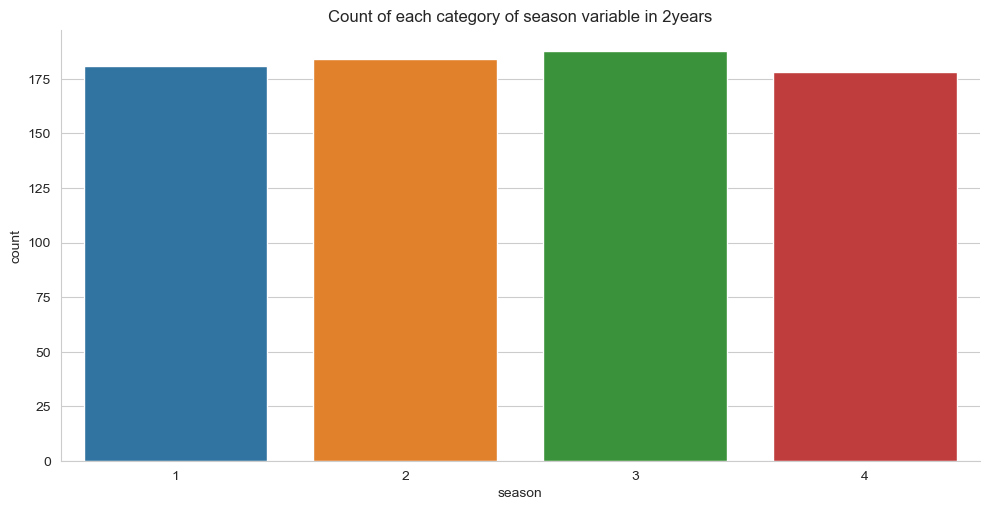

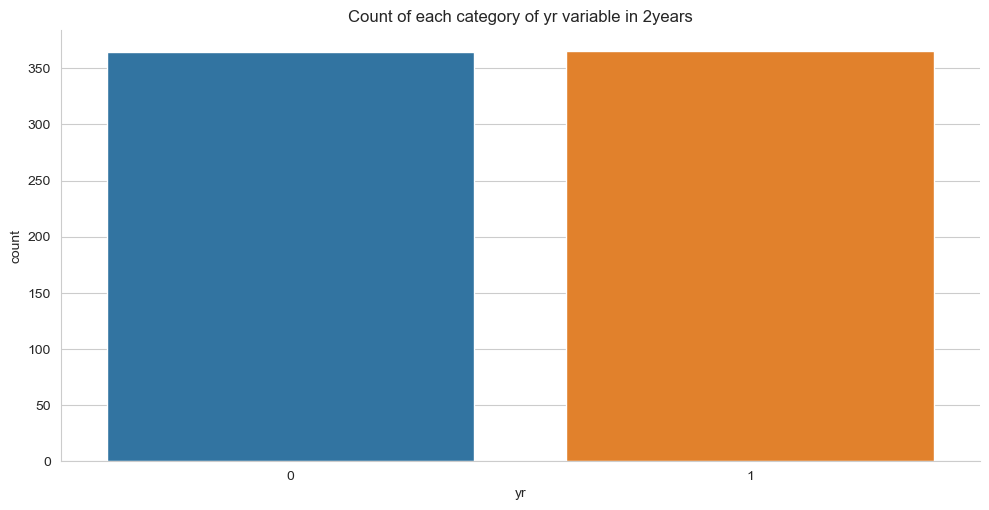

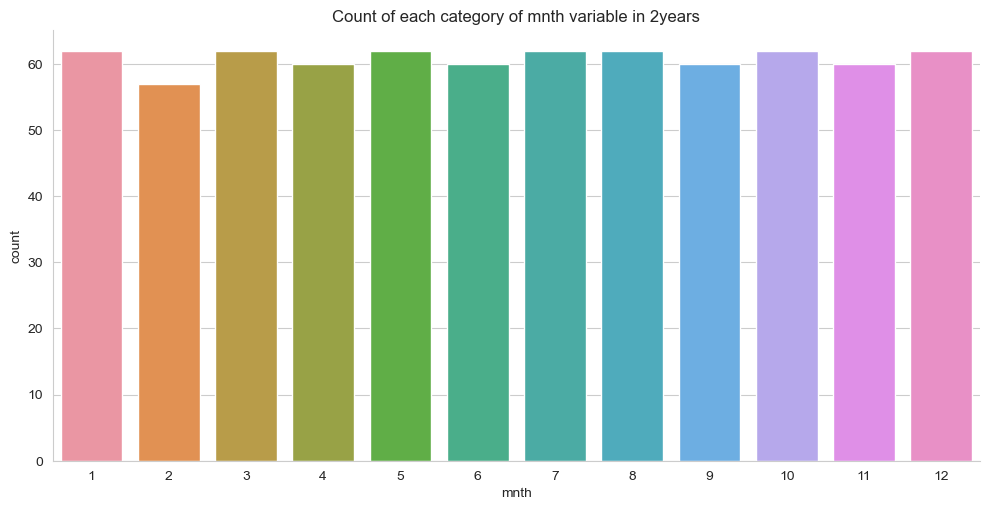

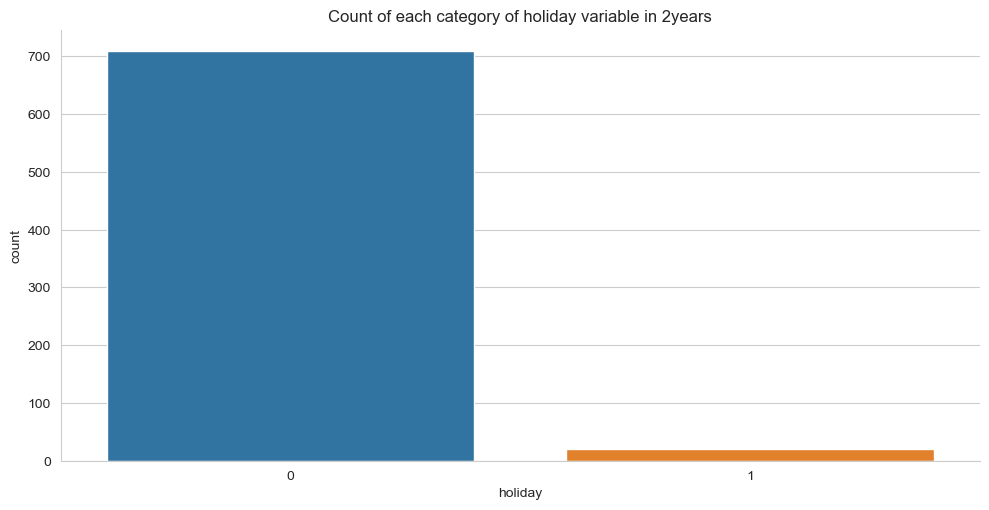

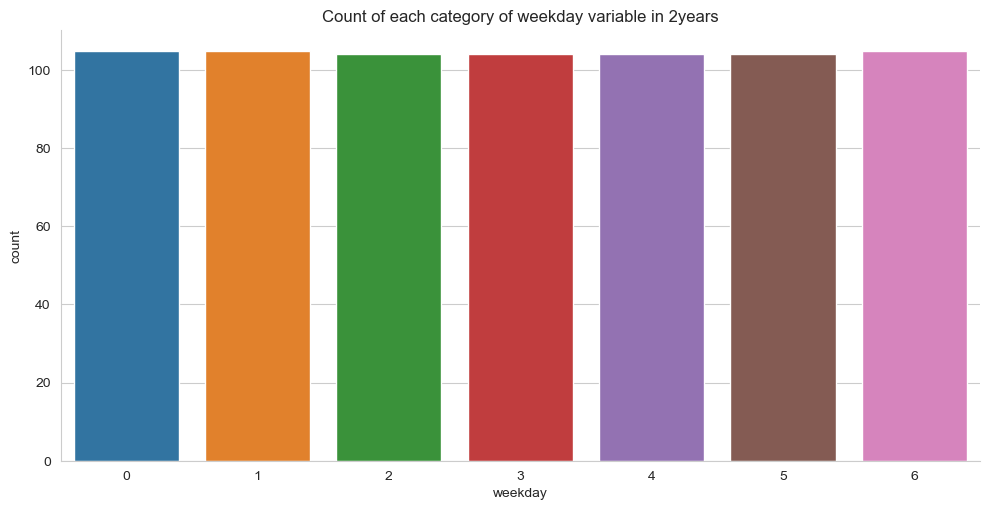

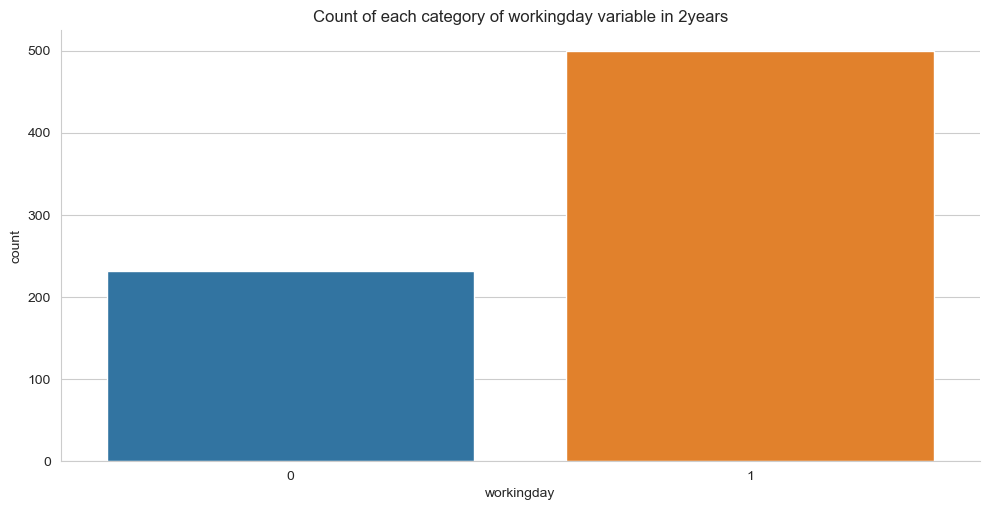

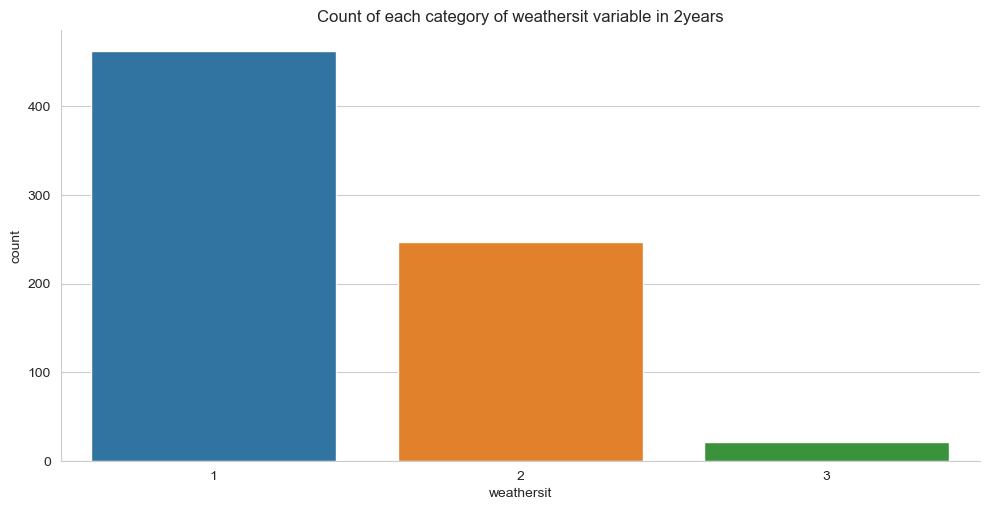

[None, None, None, None, None, None, None]

In [18]:
# Count of each category of a categorical variable
print("Checking count of each category of categorical variables in dataset\n\n")
sns.set_style("whitegrid")

def check_count_of_category(categorical_var):
    ax = sns.catplot(data=bike_sharing_train, x=categorical_var, kind= 'count',aspect=2)
    title = "Count of each category of "+categorical_var+" variable in 2years"
    plt2.title(title)
    plt2.show()
[check_count_of_category(i) for i in categorical]

##  Univariate & Bivariate analysis

In [19]:
numeric = ['temp','atemp','hum','windspeed','casual','registered','cnt']
print("Descriptive statistics about the numeric columns:")
print(bike_sharing_train[numeric].describe(),'\n')

Descriptive statistics about the numeric columns:
             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000   



Univariate analysis of numerical variables


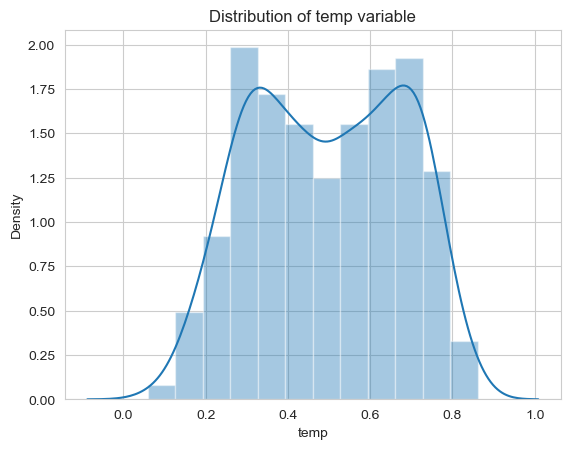

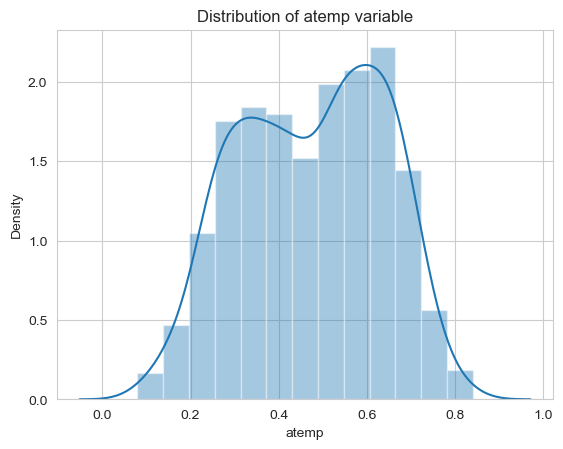

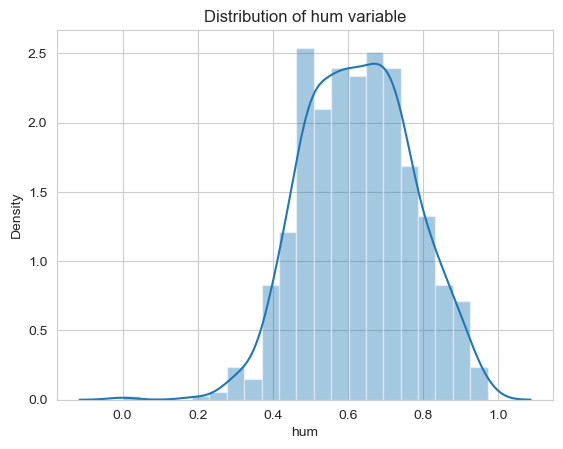

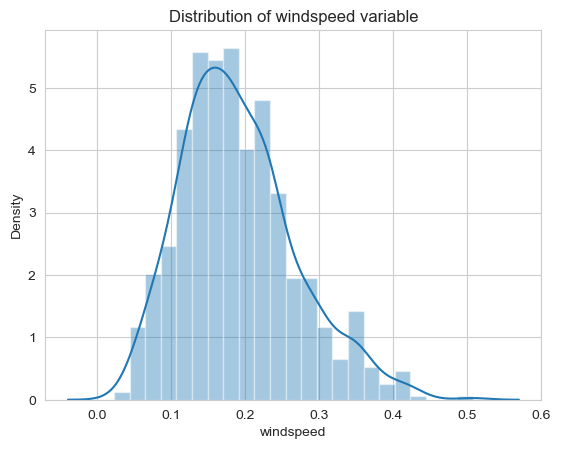

[None, None, None, None]

In [20]:
print("Univariate analysis of numerical variables")
def dist_plot(i):
    sns.distplot(bike_sharing_train[i])
    title = "Distribution of "+ i + " variable"
    plt2.title(title)
    plt2.show()
    
num = ['temp','atemp','hum','windspeed']   

[dist_plot(i) for i in num]

Bivariate analysis of numerical variables


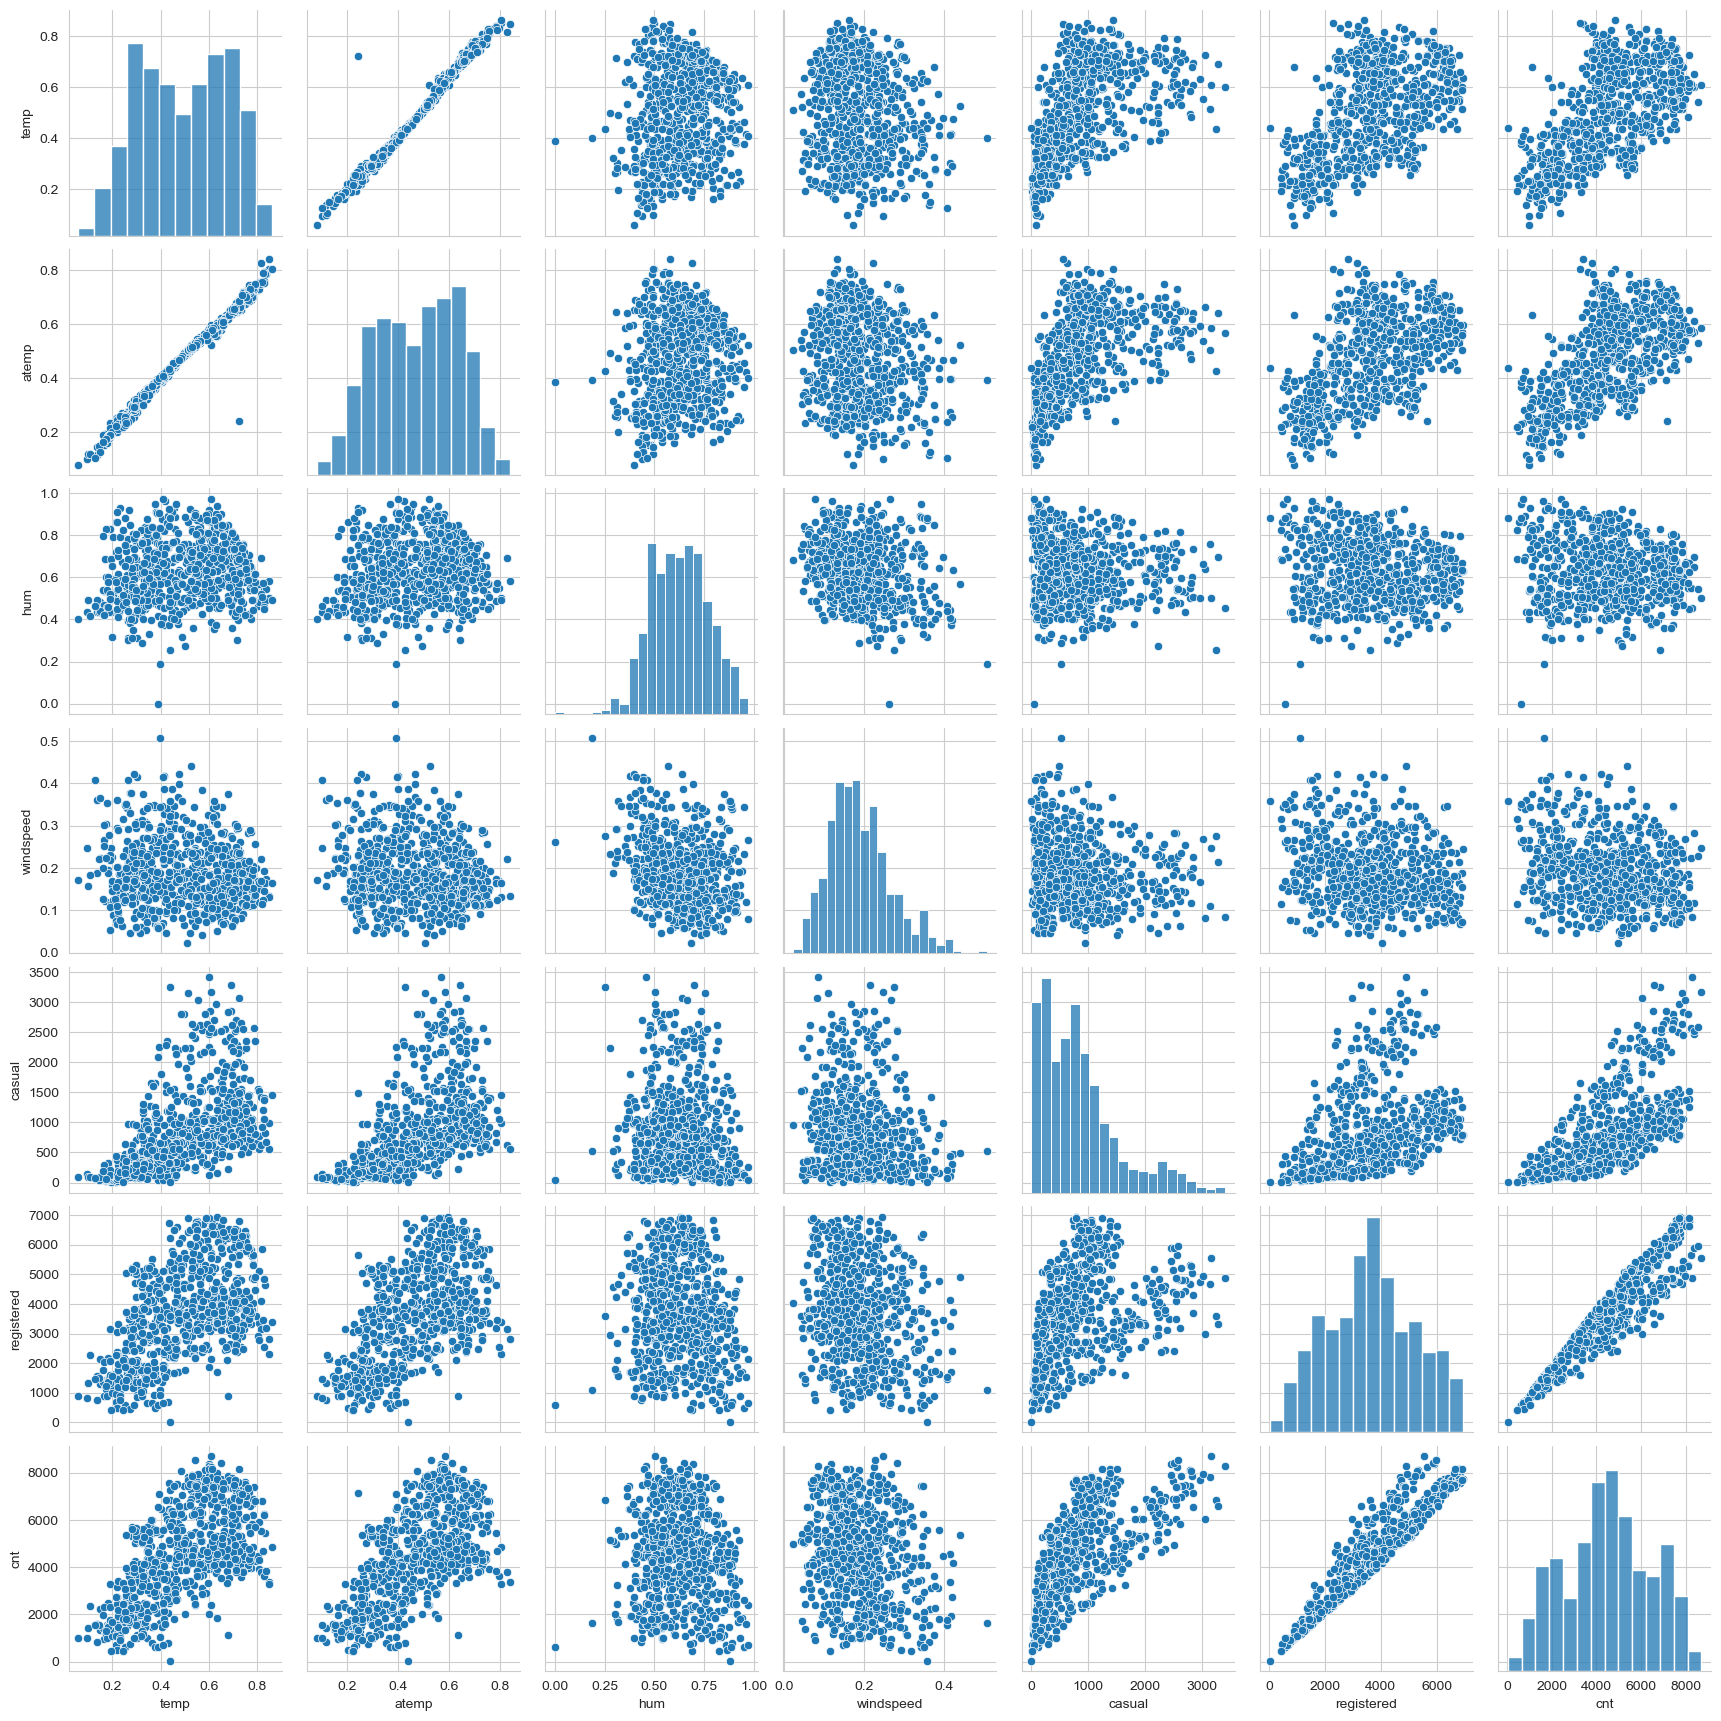

In [21]:
print("Bivariate analysis of numerical variables")
sns.pairplot(bike_sharing_train[numeric])
plt2.show()

### For Month

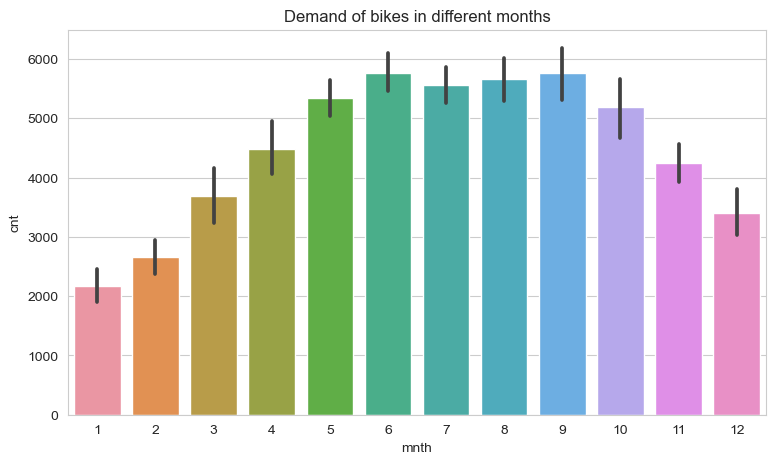

In [22]:
# Month
fig, ax = plt2.subplots(nrows = 1, ncols = 1, figsize= (9,5), squeeze=False)

x1 = 'mnth'
y1='cnt'

sns.barplot(x= x1, y = y1, data = bike_sharing_train, ax=ax[0][0])
title = "Demand of bikes in different months"
plt2.title(title)
plt2.show()

In [23]:
yr_0 = bike_sharing_train.loc[bike_sharing_train['yr'] == 0]
yr_1 = bike_sharing_train.loc[bike_sharing_train['yr'] == 1]

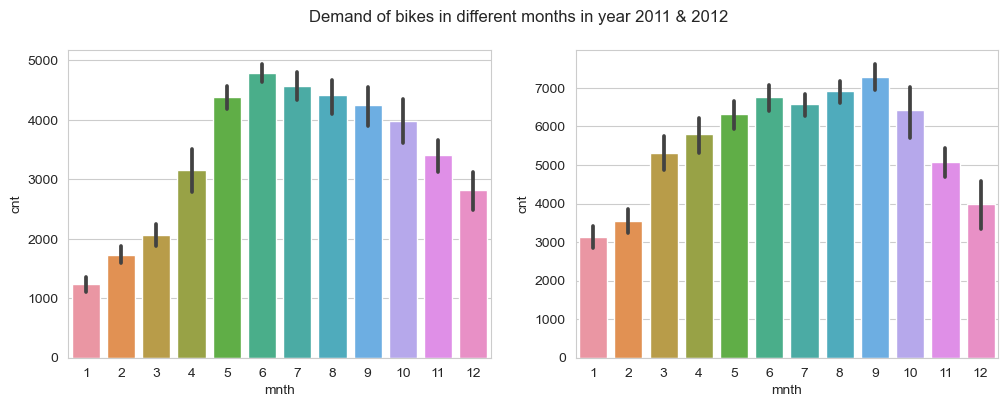

In [24]:
fig, ax = plt2.subplots(nrows = 1, ncols = 2, figsize= (12,4), squeeze=False)
fig.suptitle("Demand of bikes in different months in year 2011 & 2012")
x1 = 'mnth'
y1='cnt'
sns.barplot(x= x1, y = y1, data = yr_0, ax=ax[0][0])
sns.barplot(x= x1, y = y1, data = yr_1, ax=ax[0][1])
plt2.show()

### For Weekday

<Axes: xlabel='weekday', ylabel='cnt'>

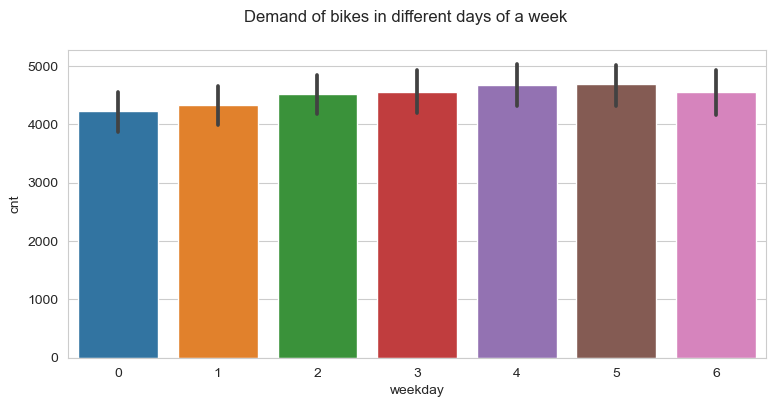

In [25]:
fig, ax = plt2.subplots(nrows = 1, ncols = 1, figsize= (9,4), squeeze=False)
fig.suptitle("Demand of bikes in different days of a week")
x1 = 'weekday'
y1='cnt'

sns.barplot(x= x1, y = y1, data = bike_sharing_train, ax=ax[0][0])


In [26]:
print("From figures we can categorize 5-10th month as one category and rest months as another category.\n")
print("Similarly,in weekday variables; workindays can be categorized as one and weekends as another category. As in working days demand of bikes found high than weekends.\n")

From figures we can categorize 5-10th month as one category and rest months as another category.

Similarly,in weekday variables; workindays can be categorized as one and weekends as another category. As in working days demand of bikes found high than weekends.



In [27]:
# Keep on adding the unwanted variables (that we will get by applying different techniques) to remove list and 
# will finally we will remove from our dataset
remove = ['instant','dteday']

## Missing Value Analysis

In [28]:
print('*'*25,'Missing Value Analysis: ','*'*25,'\n')

************************* Missing Value Analysis:  ************************* 



In [29]:
missing_val = pd.DataFrame(bike_sharing_train.isnull().sum())

In [30]:
print('Missing values in our dataset: \n')
print(missing_val)

Missing values in our dataset: 

            0
instant     0
dteday      0
season      0
yr          0
mnth        0
holiday     0
weekday     0
workingday  0
weathersit  0
temp        0
atemp       0
hum         0
windspeed   0
casual      0
registered  0
cnt         0


In [31]:
print("No missing values present in our dataset")

No missing values present in our dataset


## Outlier Analysis

In [32]:
print('*'*25,'Outlier Analysis','*'*25,'\n')

************************* Outlier Analysis ************************* 



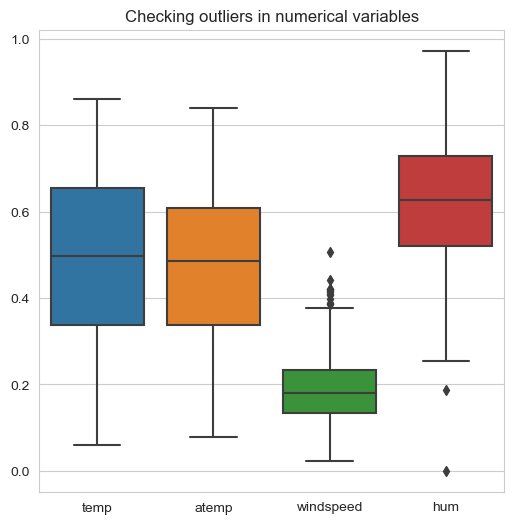

In [33]:
# Check for outliers in data using boxplot
sns.boxplot(data=bike_sharing_train[['temp','atemp','windspeed','hum']])
fig=plt2.gcf()
title = "Checking outliers in numerical variables"
plt2.title(title)
fig.set_size_inches(6,6)

In [34]:
print("Outliers found in windspeed and humidity variable")

Outliers found in windspeed and humidity variable


In [35]:
# Numeric Variables
num = ['temp','atemp','hum','windspeed']

In [36]:
# Removing the outliers
for i in num:
    q75, q25 = np.percentile(bike_sharing_train[i], [75, 25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    bike_sharing_train = bike_sharing_train.drop(bike_sharing_train[bike_sharing_train.loc[:,i] < minimum].index)
    bike_sharing_train = bike_sharing_train.drop(bike_sharing_train[bike_sharing_train.loc[:,i] > maximum].index)
print("Outliers removed")

Outliers removed


## Feature Engineering

In [37]:
bike_sharing_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0


In [38]:
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [39]:
# Creating new variables  through binning
def binned_month(row):
    if row['mnth'] <= 4 or row['mnth'] >=11:
        return(0)
    else:
        return(1)
    
def binned_weekday(row):
    if row['weekday'] < 2:
        return(0)
    else:
        return(1)

In [40]:
bike_sharing_train['month_binned'] = bike_sharing_train.apply(lambda row : binned_month(row), axis=1)
bike_sharing_train = bike_sharing_train.drop(columns=['mnth'])
bike_sharing_train['weekday_binned'] = bike_sharing_train.apply(lambda row : binned_weekday(row), axis=1)
bike_sharing_train = bike_sharing_train.drop(columns=['weekday'])

In [41]:
categorical.remove('mnth')
categorical.remove('weekday')
categorical.append('month_binned')
categorical.append('weekday_binned')

## Feature Selection

In [42]:
bike_sharing_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'holiday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'month_binned', 'weekday_binned'],
      dtype='object')

### Correlation Analysis

In [43]:
df_corr = bike_sharing_train[numeric]

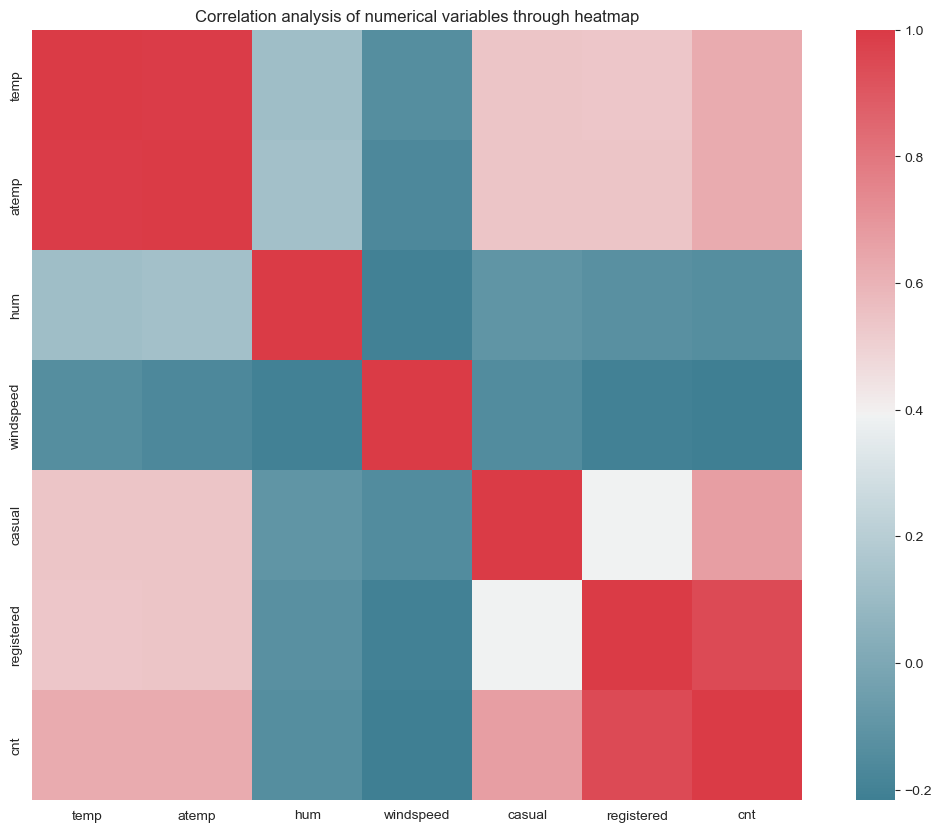

In [44]:
# Correlation Analysis
f, ax = plt2.subplots(figsize=(14, 10))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt2.title("Correlation analysis of numerical variables through heatmap")
plt2.show()

In [45]:
print("From correlation analysis we found,\n    1.temp and atemp are highly correlated.\n    2.registered and cnt also showing high correlation.\n")

From correlation analysis we found,
    1.temp and atemp are highly correlated.
    2.registered and cnt also showing high correlation.



In [46]:
remove.extend(['atemp','casual','registered'])

### Chi-square test

In [47]:
print("Chi-square Test\n1. Null Hypothesis: Two variables are independent\n2. Alternate Hypothesis: Two variables are not independent\n3. p-value < 0.05 , can not accept null hypothesis\n")
print("That means p < 0.05 means two categorical variables are dependent, so we will remove one of variable from that pair to avoid sending the same information to our model through 2 variables")

Chi-square Test
1. Null Hypothesis: Two variables are independent
2. Alternate Hypothesis: Two variables are not independent
3. p-value < 0.05 , can not accept null hypothesis

That means p < 0.05 means two categorical variables are dependent, so we will remove one of variable from that pair to avoid sending the same information to our model through 2 variables


In [48]:
# Create all combinations 
factors_paired = [(i,j) for i in categorical for j in categorical] 

In [49]:
# Calculating p-values for each pair
p_values = []
from scipy.stats import chi2_contingency
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_sharing_train[factor[0]], 
                                                    bike_sharing_train[factor[1]]))
        if(p<0.05):
            p_values.append({factor:p.round(3)})
    else:
        p_values.append('-')

[print(i,'\n') for i in p_values if i != '-']

{('season', 'weathersit'): 0.013} 

{('season', 'month_binned'): 0.0} 

{('holiday', 'workingday'): 0.0} 

{('holiday', 'weekday_binned'): 0.0} 

{('workingday', 'holiday'): 0.0} 

{('workingday', 'weekday_binned'): 0.0} 

{('weathersit', 'season'): 0.013} 

{('month_binned', 'season'): 0.0} 

{('weekday_binned', 'holiday'): 0.0} 

{('weekday_binned', 'workingday'): 0.0} 



[None, None, None, None, None, None, None, None, None, None]

In [50]:
print("Season with Weathersit-Month\nHoliday with Worikingday-Weekday\nWorkingday with Weekday-Holiday\n")

Season with Weathersit-Month
Holiday with Worikingday-Weekday
Workingday with Weekday-Holiday



In [51]:
bike_sharing_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'holiday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'month_binned', 'weekday_binned'],
      dtype='object')

### Importance of Features

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
X = bike_sharing_train.drop(columns=['cnt','casual','registered','instant','dteday'])
y = bike_sharing_train['cnt']
model = clf.fit(X, y)
importances = model.feature_importances_


In [53]:
X.columns

Index(['season', 'yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'month_binned', 'weekday_binned'],
      dtype='object')

In [54]:
print("Checking feature importance: \n")
l = list(zip(X,importances))
l.sort(key = lambda x: x[1]) 
[print(i[0]," : ",i[1].round(3)) for i in l]

Checking feature importance: 

holiday  :  0.007
month_binned  :  0.019
weekday_binned  :  0.029
workingday  :  0.032
weathersit  :  0.037
yr  :  0.039
season  :  0.049
temp  :  0.194
atemp  :  0.195
windspeed  :  0.198
hum  :  0.201


[None, None, None, None, None, None, None, None, None, None, None]

In [55]:
remove.append('holiday')

### Multi-colinearity test

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
from statsmodels.tools.tools import add_constant
numeric_df = add_constant(bike_sharing_train[['temp', 'atemp', 'hum', 'windspeed']])
vif = pd.Series([vf(numeric_df.values, j) for j in range(numeric_df.shape[1])],index = numeric_df.columns)
vif.round(3)

const        46.436
temp         63.326
atemp        63.933
hum           1.057
windspeed     1.102
dtype: float64

In [57]:
print("After removing atemp variable , VIF:\n")
numeric_df = add_constant(bike_sharing_train[['temp', 'hum', 'windspeed']])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
print(vif.round(3))

After removing atemp variable , VIF:

const        41.644
temp          1.028
hum           1.052
windspeed     1.059
dtype: float64


### Dummy for categorical

In [58]:
season_dm = pd.get_dummies(bike_sharing_train['season'], drop_first=True, prefix='season')
bike_sharing_train = pd.concat([bike_sharing_train, season_dm],axis=1)
bike_sharing_train = bike_sharing_train.drop(columns = ['season'])
weather_dm = pd.get_dummies(bike_sharing_train['weathersit'], prefix= 'weather',drop_first=True)
bike_sharing_train = pd.concat([bike_sharing_train, weather_dm],axis=1)
bike_sharing_train = bike_sharing_train.drop(columns= ['weathersit'])

In [59]:
remove

['instant', 'dteday', 'atemp', 'casual', 'registered', 'holiday']

In [60]:
# Removing unwanted variables
bike_sharing_train.drop(columns=remove, inplace=True)

In [61]:
# Reshaping
cnt = bike_sharing_train['cnt']
bike_sharing_train = bike_sharing_train.drop(columns=['cnt'])
bike_sharing_train['cnt'] = cnt

In [62]:
bike_sharing_train.shape

(717, 13)

In [63]:
print(bike_sharing_train.head(5), '\n')
print('shape of dataset after all pre-processing\n',bike_sharing_train.shape)

  yr workingday      temp       hum  windspeed  month_binned  weekday_binned  \
0  0          0  0.344167  0.805833   0.160446             0               1   
1  0          0  0.363478  0.696087   0.248539             0               0   
2  0          1  0.196364  0.437273   0.248309             0               0   
3  0          1  0.200000  0.590435   0.160296             0               1   
4  0          1  0.226957  0.436957   0.186900             0               1   

   season_2  season_3  season_4  weather_2  weather_3     cnt  
0         0         0         0          1          0   985.0  
1         0         0         0          1          0   801.0  
2         0         0         0          0          0  1349.0  
3         0         0         0          0          0  1562.0  
4         0         0         0          0          0  1600.0   

shape of dataset after all pre-processing
 (717, 13)


### Model Development

In [64]:
# Modularizing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

def fit_N_predict(model, X_train, y_train, X_test, y_test,model_code=''):
    
    if(model_code == 'OLS'):
        model = model.OLS(y_train,X_train.astype('float')).fit()
        print(model.summary())
        y_pred = model.predict(X_test.astype('float'))
        print("\n================================")
        print('Score on testing data: ',(r2_score(y_test,y_pred)*100).round(3))
        print("================================")
        return
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("================================")
    print("Score on training data: ",(model.score(X_train, y_train)*100.0).round(3))
    print("================================")
    print("Score on testing data: ", (model.score(X_test, y_test)*100.0).round(3)) ## Same as r-squared value
    print("================================")
    
    if(model_code == "DT"):
        from sklearn import tree
        dotfile = open("pt.dot","w")
        df = tree.export_graphviz(model, out_file=dotfile, feature_names = X_train.columns)
    
    
    
        


In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from statistics import mean 
kf = KFold(n_splits=10, shuffle=True, random_state=42)


def cross_validation(model,X,y):
    l = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        l.append(r2_score(y_test,y_pred))
    print("Mean of 10 cross validation scores = ",(mean(l)*100).round(3))

In [66]:
# Partitioning of dataset
X = bike_sharing_train.drop(columns=['cnt'])
y = bike_sharing_train[['cnt']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
print('######################### LINEAR REGRESSION #########################')
from sklearn.linear_model import LinearRegression

model = LinearRegression()
fit_N_predict(model, X_train, y_train, X_test, y_test, model_code="SK_LR")
cross_validation(model,X,y)

######################### LINEAR REGRESSION #########################
Score on training data:  81.263
Score on testing data:  87.42
Mean of 10 cross validation scores =  81.57


In [68]:
import statsmodels.api as sm
model = sm
fit_N_predict(model,X_train, y_train, X_test, y_test,model_code="OLS")

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1533.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:14:35   Log-Likelihood:                         -4671.9
No. Observations:                 573   AIC:                                      9368.
Df Residuals:                     561   BIC:                                      9420.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [69]:
print('######################### K NEIGHBOURS REGRESSOR #########################')
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
fit_N_predict(model, X_train, y_train, X_test, y_test,model_code="KNN")
cross_validation(model,X,y)

######################### K NEIGHBOURS REGRESSOR #########################
Score on training data:  85.281
Score on testing data:  87.095
Mean of 10 cross validation scores =  79.448


In [70]:
print('######################### SVR #########################')
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
fit_N_predict(model, X_train, y_train, X_test, y_test, model_code="SVR")
cross_validation(model,X,y)

######################### SVR #########################
Score on training data:  9.268
Score on testing data:  9.741
Mean of 10 cross validation scores =  9.232


In [71]:
print('######################### Decision Tree #########################')

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)
fit_N_predict(model, X_train, y_train, X_test, y_test, model_code="DT")
cross_validation(model,X,y)

######################### Decision Tree #########################
Score on training data:  100.0
Score on testing data:  82.819
Mean of 10 cross validation scores =  74.95


In [72]:
print('######################### Random Forest #########################')

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
fit_N_predict(model, X_train, y_train, X_test, y_test, model_code="RF")
cross_validation(model,X,y)

######################### Random Forest #########################
Score on training data:  97.986
Score on testing data:  91.827
Mean of 10 cross validation scores =  86.45


In [74]:
# Pre-processing of data for XGBoost
bike = bike_sharing_train.copy()
yr_dm = pd.get_dummies(bike['yr'], prefix= 'yr',drop_first=True)
bike = pd.concat([bike, yr_dm],axis=1)
bike = bike.drop(columns= ['yr'])

workingday_dm = pd.get_dummies(bike['workingday'], prefix= 'workingday',drop_first=True)
bike = pd.concat([bike, workingday_dm],axis=1)
bike = bike.drop(columns= ['workingday'])

bike['yr_1'] = bike['yr_1'].astype('int')
bike['workingday_1'] = bike['workingday_1'].astype('int')

X1 = bike.drop(columns=['cnt'])
y1 = bike['cnt']
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [75]:
print('######################### Gradient Boosting Regressor #########################')

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=1)

# Assuming fit_N_predict is a custom function you have defined
fit_N_predict(model, X_train1, y_train1, X_test1, y_test1, model_code="GBR")

######################### Gradient Boosting Regressor #########################
Score on training data:  94.217
Score on testing data:  92.338


## Hyper-parameter tuning for the best models

In [79]:
# Developing Random Forest model with best params
model = RandomForestRegressor(random_state=1, max_depth=14, n_estimators=500,
                                  max_features='auto', min_samples_leaf=2,min_samples_split=2)
fit_N_predict(model, X_train, y_train, X_test, y_test, model_code="RF")
cross_validation(model,X,y)

Score on training data:  96.263
Score on testing data:  91.706
Mean of 10 cross validation scores =  86.835


Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 1, 'subsample': 0.7}


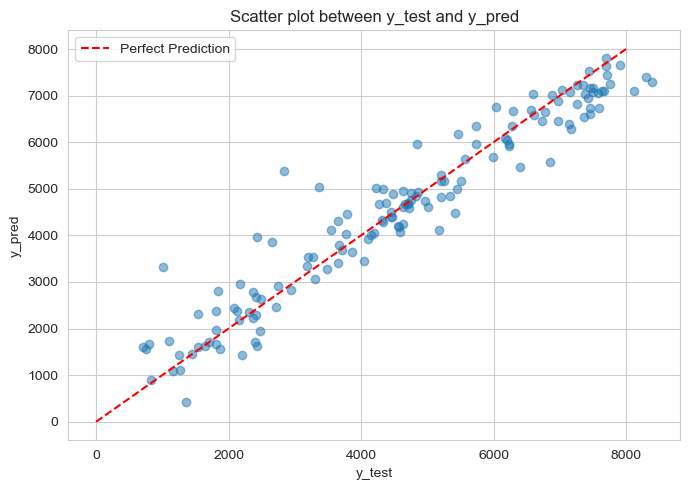

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the best model with the parameters found
model = GradientBoostingRegressor(random_state=1, learning_rate=0.045, max_depth=3, n_estimators=300, subsample=0.7)

# Fit the model
model.fit(X_train1, y_train1)

# Predict the test set
y_pred = model.predict(X_test1)

# Scatterplot showing the prediction vs actual values
fig, ax = plt2.subplots(figsize=(7, 5))
ax.scatter(y_test1, y_pred, alpha=0.5)
ax.plot([0, 8000], [0, 8000], 'r--', label='Perfect Prediction')
ax.legend()
plt2.title("Scatter plot between y_test and y_pred")
plt2.xlabel("y_test")
plt2.ylabel("y_pred")
plt2.tight_layout()
plt2.show()